In [1]:
import platform
import datetime

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action = 'ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
# 데이터 불러오기
raw_data = pd.read_csv('Data/4th_data.csv')

print('Shape of raw_data :', raw_data.shape, '\n')
print(raw_data.info(), '\n')

# 데이터의 일부분 살펴보기
display(raw_data.head(14))

Shape of raw_data : (13262, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               13262 non-null  int64  
 1   taskID               13262 non-null  object 
 2   originator           13262 non-null  object 
 3   eventtype            13262 non-null  object 
 4   timestamp            13262 non-null  object 
 5   contact              1000 non-null   object 
 6   RepairType           927 non-null    object 
 7   objectKey            927 non-null    float64
 8   RepairInternally     927 non-null    object 
 9   EstimatedRepairTime  927 non-null    float64
 10  RepairCode           927 non-null    float64
 11  RepairOK             1854 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB
None 



,caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1,FirstContact,Dian,complete,1970-01-02 08:08,Phone,NaN,NaN,NaN,NaN,NaN,NaN
1,1,MakeTicket,Dian,start,1970-01-02 08:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,MakeTicket,Dian,complete,1970-01-02 08:11,NaN,E,1340.0,NaN,NaN,NaN,NaN
3,1,ArrangeSurvey,Dian,start,1970-01-02 08:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,ArrangeSurvey,Dian,complete,1970-01-02 08:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,InformClientSurvey,System,complete,1970-01-02 08:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,Survey,Cindy,start,1970-01-11 21:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Survey,Cindy,complete,1970-01-11 21:56,NaN,NaN,NaN,True,240.0,1.0,NaN
8,1,InternRepair,John,start,1970-01-17 04:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,InternRepair,John,complete,1970-01-17 08:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 데이터를 살펴보면, 하나의 caseID에 대해서 A/S 수행 기록이 담긴 데이터임을 확인할 수 있다.

- 각 단계(taskID)에서 몇 개의 caseID가 지나가는지 살펴보도록 하자.

In [4]:
# 각 단계에서 몇개의 'caseID'가 지나가는지
pd.pivot_table(raw_data, columns = 'taskID', values = 'caseID', aggfunc = pd.Series.nunique)

taskID,ArrangeSurvey,ExternRepair,FirstContact,ImmediateRepair,InformClientSurvey,InformClientWrongPlace,InternRepair,MakeTicket,ReadyInformClient,RepairReady,SendTicketToFinAdmin,Survey,TicketReady
caseID,927,132,1000,383,927,73,508,927,927,927,927,927,927


**FirstContact** : 1000

**InformClientWrongPlace** : 73, **MakeTicket** : 927

**ArrangeSurvey** : 927

**InformClientSurvey** : 927

**Survey** : 927

**InternRepair** : 508, **ImmediateRepair** : 383, **ExternRepair** : 132

**RepairReady** : 927

**SendTicketToFinAdmin** : 927, **ReadyInformClient** : 927

**TicketReady** : 927

In [5]:
# taksID의 각 범주에 따라 데이터를 추출하고 구조를 변환시켜주는 함수 생성
def data_reshape_extract(data = None, pro = None, pro_type = None, columns = None, two_event = False):
    
    # 기본적으로 담아야할 변수 저장
    value_list = ['caseID', 'taskID', 'originator', 'eventtype', 'timestamp']
    
    # 추가로 담을 변수 추가 저장
    if columns != None:
        for col in columns:
            value_list.append(col)
    
    else:
        value_list = value_list
    
    # 데이터 추출
    data = data[data[pro].isin(pro_type)][value_list]
    
    # 'timestamp' 변수의 타입이 문자열이므로 날짜형 타입으로 변경
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    
    # 'eventtype'의 값이 모두 'complete'인 경우
    if two_event == False:
        
        # 'CompleteTime'과 'StartTime' 변수를 생성해준 뒤, 'eventtype' 변수 삭제
        data['CompleteTime'] = data['timestamp']
        data = data.rename(columns = {'timestamp' : 'StartTime'})
        data = data.drop('eventtype', axis = 1)
    
    # 'eventtype'의 값이 'start'와 'complete'로 나눠져 있는 경우
    else:
        
        # 'StartTime' 변수를 0으로 생성
        data['StartTime'] = pd.to_datetime(0)
        
        # 'eventtype'의 값이 'start'일 때의, 'caseID', 'taskID', 'originator', 'timestamp' 추출
        start_data = data[data['eventtype'] == 'start'][['caseID', 'taskID', 'originator', 'timestamp']]
        
        for index in start_data.index:
            
            # start_data의 'caseID', 'taskID', 'originator', 'timestamp' 추출
            case = start_data.loc[index, 'caseID']
            task = start_data.loc[index, 'taskID']
            origin = start_data.loc[index, 'originator']
            time = start_data.loc[index, 'timestamp']
            
            # 'caseID', 'taskID', 'originator'가 모두 같은 경우, 'StartTime' 변수에 'timestamp' 값 저장
            data.loc[(data['caseID'] == case) & (data['taskID'] == task) &\
                     (data['originator'] == origin), 'StartTime'] = time
            
        # 반복문 수행 후, 변수명 변경
        data = data.rename(columns = {'timestamp' : 'CompleteTime'})
        
        # pro_type에 'ExternRepair'이 포함되어 있는 경우와 포함되어 있지 않은 경우를 나눠서 처리한다.
        if 'ExternRepair' in pro_type:
            
            # 'ExternRepair'은 'eventtype'의 값이 'start'만 존재한다.
            extern_data = data[data['taskID'] == 'ExternRepair']
            other_data = data[data['taskID'] != 'ExternRepair']
            
            # 'ExternRepair'이 포함되어 있지 않은 데이터에서는 'eventtype'이 'start'인 경우를 삭제해준다.
            other_data = other_data[other_data['eventtype'] != 'start']
            
            # 위의 과정을 수행한 후 데이터를 병합한 뒤, 순서에 맞게 정렬해준다.
            data = pd.concat([other_data, extern_data])
            data = data.sort_values(['caseID', 'StartTime', 'CompleteTime'])
        
        else:
            # 한 개의 row에 StartTime과 CompleteTime을 생성해주었으므로, 'eventtype'이 'start'인 경우 삭제
            data = data[data['eventtype'] != 'start']
        
        # 'eventtype' 변수 삭제
        data = data.drop('eventtype', axis = 1)
    
    data.reset_index(drop = True, inplace = True)
    
    return data

In [6]:
# 해당하는 데이터와 날짜형 변수를 입력하면 일, 주말여부, 시간, 분 변수를 생성해주는 함수
def extract_datetime(raw_data = None, feature = None, name = None):
    
    # 입력 데이터 복사
    data = raw_data.copy()
    
    print('Shape of data *Before Create* :', data.shape, '\n')
    
    # Day
    data['{}_Day'.format(name)] = data[feature].apply(lambda x: x.day)
    
    # Week
    data['{}_Week'.format(name)] = data[feature].apply(lambda x: x.week)
    
    # Hour
    data['{}_Hour'.format(name)] = data[feature].apply(lambda x: x.hour)
    
    # Minute
    data['{}_Minute'.format(name)] = data[feature].apply(lambda x: x.minute)
    
    print('Shape of data *After Create* :', data.shape)
    
    return data

## [1]. FirstContact

In [7]:
# FirstContact 단계에서 'contact' 정보를 얻을 수 있다.
first_data = data_reshape_extract(raw_data, pro = 'taskID', pro_type = ['FirstContact'],
                                  columns = ['contact'], two_event = False)


# features의 순서 변경
first_data = first_data[['caseID', 'taskID', 'originator', 'contact', 'StartTime', 'CompleteTime']]
print('Shape of FirstContact data :', first_data.shape, '\n')

display(first_data.head())

Shape of FirstContact data : (1000, 6) 



,caseID,taskID,originator,contact,StartTime,CompleteTime
0,1,FirstContact,Dian,Phone,1970-01-02 08:08:00,1970-01-02 08:08:00
1,2,FirstContact,Dian,Personal,1970-01-08 05:17:00,1970-01-08 05:17:00
2,3,FirstContact,Dian,Phone,1970-01-03 01:03:00,1970-01-03 01:03:00
3,4,FirstContact,Monica,Personal,1970-01-03 08:23:00,1970-01-03 08:23:00
4,5,FirstContact,Monica,Letter,1970-01-07 20:41:00,1970-01-07 20:41:00


In [9]:
# 함수 적용
first_data = extract_datetime(raw_data = first_data, feature = 'StartTime', name = 'Start')

# 데이터 확인
display(first_data.head())

Shape of data *Before Create* : (1000, 6) 

Shape of data *After Create* : (1000, 10)


,caseID,taskID,originator,contact,StartTime,CompleteTime,Start_Day,Start_Week,Start_Hour,Start_Minute
0,1,FirstContact,Dian,Phone,1970-01-02 08:08:00,1970-01-02 08:08:00,2,1,8,8
1,2,FirstContact,Dian,Personal,1970-01-08 05:17:00,1970-01-08 05:17:00,8,2,5,17
2,3,FirstContact,Dian,Phone,1970-01-03 01:03:00,1970-01-03 01:03:00,3,1,1,3
3,4,FirstContact,Monica,Personal,1970-01-03 08:23:00,1970-01-03 08:23:00,3,1,8,23
4,5,FirstContact,Monica,Letter,1970-01-07 20:41:00,1970-01-07 20:41:00,7,2,20,41


In [10]:
pd.pivot_table(first_data, index = 'Start_Day', columns = 'contact', values = 'caseID', aggfunc = 'count')

contact,Letter,Personal,Phone,Web
Start_Day,,,,
1,18,17,25,23
2,35,35,39,35
3,23,34,44,41
4,38,42,34,35
5,29,43,40,34
6,38,30,36,41
7,33,29,40,44
8,11,10,12,12


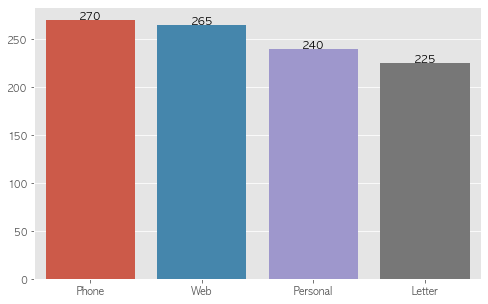

In [12]:
# 어떤 접촉기기로 많이 접속하였는지
plot_data = pd.DataFrame(first_data['contact'].value_counts())

# 시각화 과정
plt.figure(figsize = (8, 5))

sns.barplot(x = plot_data.index, y = 'contact', data = plot_data)
plt.ylabel('')

for index, [value] in enumerate(plot_data.values):
    plt.text(index, value, value, ha = 'center', fontsize = 11)
    
plt.show()

## [2-1]. InformClientWrongPlace

In [14]:
# InformClientWrongPlace 단계
wrong_data = data_reshape_extract(raw_data, pro = 'taskID', pro_type = ['InformClientWrongPlace'],
                                  two_event = False)

print('Shape of InformClientWrongPlace data :', wrong_data.shape, '\n')
display(wrong_data.head())

Shape of InformClientWrongPlace data : (73, 5) 



,caseID,taskID,originator,StartTime,CompleteTime
0,6,InformClientWrongPlace,Monica,1970-01-03 02:29:00,1970-01-03 02:29:00
1,7,InformClientWrongPlace,Monica,1970-01-07 09:21:00,1970-01-07 09:21:00
2,13,InformClientWrongPlace,Monica,1970-01-02 12:22:00,1970-01-02 12:22:00
3,40,InformClientWrongPlace,Monica,1970-01-06 05:07:00,1970-01-06 05:07:00
4,61,InformClientWrongPlace,Monica,1970-01-06 12:40:00,1970-01-06 12:40:00


## [2-2]. MakeTicket

In [15]:
# MakeTicket 단계에서 'RepairType', 'objectKey' 정보를 얻을 수 있다.
make_data = data_reshape_extract(raw_data, pro = 'taskID', pro_type = ['MakeTicket'],
                                 columns = ['RepairType', 'objectKey'], two_event = True)

# features의 순서 변경
make_data = make_data[['caseID', 'taskID', 'originator', 'RepairType', 'objectKey', 'StartTime', 'CompleteTime']]
print('Shape of MakeTicket data :', make_data.shape, '\n')
display(make_data.head())

Shape of MakeTicket data : (927, 7) 



,caseID,taskID,originator,RepairType,objectKey,StartTime,CompleteTime
0,1,MakeTicket,Dian,E,1340.0,1970-01-02 08:08:00,1970-01-02 08:11:00
1,2,MakeTicket,Dian,P,8161.0,1970-01-08 05:17:00,1970-01-08 05:21:00
2,3,MakeTicket,Dian,E,3844.0,1970-01-03 01:03:00,1970-01-03 01:10:00
3,4,MakeTicket,Monica,P,6582.0,1970-01-03 08:23:00,1970-01-03 08:27:00
4,5,MakeTicket,Monica,P,9857.0,1970-01-07 20:41:00,1970-01-07 20:47:00


In [16]:
pd.crosstab(make_data['originator'], make_data['RepairType'])

RepairType,B,E,P
originator,,,
Dian,56,185,196
Monica,62,185,243


## [3]. ArrangeSurvey

In [17]:
# ArrangeSurvey 단계
arrange_data = data_reshape_extract(raw_data, pro = 'taskID', pro_type = ['ArrangeSurvey'], 
                                    two_event = True)

# features의 순서 변경
arrange_data = arrange_data[['caseID', 'taskID', 'originator', 'StartTime', 'CompleteTime']]
print('Shape of ArrangeSurvey data :', arrange_data.shape, '\n')
display(arrange_data.head())

Shape of ArrangeSurvey data : (927, 5) 



,caseID,taskID,originator,StartTime,CompleteTime
0,1,ArrangeSurvey,Dian,1970-01-02 08:11:00,1970-01-02 08:16:00
1,2,ArrangeSurvey,Dian,1970-01-08 05:21:00,1970-01-08 05:25:00
2,3,ArrangeSurvey,Dian,1970-01-03 01:10:00,1970-01-03 01:14:00
3,4,ArrangeSurvey,Monica,1970-01-03 08:27:00,1970-01-03 08:32:00
4,5,ArrangeSurvey,Monica,1970-01-07 20:47:00,1970-01-07 20:52:00


## [4]. InformClientSurvey

In [18]:
# InformClientSurvey 단계
inform_data = data_reshape_extract(raw_data, pro = 'taskID', pro_type = ['InformClientSurvey'],
                                  two_event = False)

print('Shape of InformClientSurvey data :', inform_data.shape, '\n')
display(inform_data.head())

Shape of InformClientSurvey data : (927, 5) 



,caseID,taskID,originator,StartTime,CompleteTime
0,1,InformClientSurvey,System,1970-01-02 08:16:00,1970-01-02 08:16:00
1,2,InformClientSurvey,System,1970-01-08 05:25:00,1970-01-08 05:25:00
2,3,InformClientSurvey,System,1970-01-03 01:14:00,1970-01-03 01:14:00
3,4,InformClientSurvey,System,1970-01-03 08:32:00,1970-01-03 08:32:00
4,5,InformClientSurvey,System,1970-01-07 20:52:00,1970-01-07 20:52:00


## [5]. Survey

In [19]:
# Survey 단계에서 'RepairInternally', 'EstimatedRepairTime', 'RepairCode' 정보를 얻을 수 있다.
survey_data = data_reshape_extract(raw_data, pro = 'taskID', pro_type = ['Survey'],
                                   columns = ['RepairInternally', 'EstimatedRepairTime', 'RepairCode'],
                                   two_event = True)

# features의 순서 변경
survey_data = survey_data[['caseID', 'taskID', 'originator', 'RepairInternally', 
                           'EstimatedRepairTime', 'RepairCode', 'StartTime', 'CompleteTime']]
print('Shape of Survey data :', survey_data.shape, '\n')
display(survey_data.head())

Shape of Survey data : (927, 8) 



,caseID,taskID,originator,RepairInternally,EstimatedRepairTime,RepairCode,StartTime,CompleteTime
0,1,Survey,Cindy,True,240.0,1.0,1970-01-11 21:33:00,1970-01-11 21:56:00
1,2,Survey,Anne,True,120.0,1.0,1970-01-12 04:19:00,1970-01-12 04:57:00
2,3,Survey,Paul,True,220.0,2.0,1970-01-06 06:31:00,1970-01-06 06:47:00
3,4,Survey,Anne,True,120.0,1.0,1970-01-04 17:03:00,1970-01-04 17:42:00
4,5,Survey,Anne,True,120.0,1.0,1970-01-09 22:35:00,1970-01-09 23:22:00


In [20]:
pd.crosstab(survey_data['EstimatedRepairTime'], survey_data['RepairCode'])

RepairCode,1.0,2.0,3.0,4.0
EstimatedRepairTime,,,,
60.0,18,0,0,0
120.0,298,0,67,0
160.0,0,0,27,0
220.0,0,136,0,0
240.0,234,88,0,0
360.0,0,0,0,38
480.0,0,0,0,21


In [21]:
survey_data['EstimatedRepairTime'].value_counts()

120.0    365
240.0    322
220.0    136
360.0     38
160.0     27
480.0     21
60.0      18
Name: EstimatedRepairTime, dtype: int64

## [6]. InternRepair & ImmediateRepair & ExternRepair

In [22]:
# 'InternRepair', 'ImmediateRepair', 'ExternRepair' 단계
repair_data = data_reshape_extract(raw_data, pro = 'taskID', 
                                   pro_type = ['InternRepair', 'ImmediateRepair', 'ExternRepair'],
                                   two_event = True)

# features의 순서 변경
repair_data = repair_data[['caseID', 'taskID', 'originator', 'StartTime', 'CompleteTime']]
print('Shape of Repair data :', repair_data.shape, '\n')
display(repair_data.head())

Shape of Repair data : (1062, 5) 



,caseID,taskID,originator,StartTime,CompleteTime
0,1,InternRepair,John,1970-01-17 04:36:00,1970-01-17 08:12:00
1,2,ImmediateRepair,Anne,1970-01-12 04:57:00,1970-01-12 06:57:00
2,2,ExternRepair,DoIt,1970-01-12 06:57:00,1970-01-12 06:57:00
3,3,InternRepair,Paul,1970-01-06 19:50:00,1970-01-06 23:30:00
4,4,ImmediateRepair,Anne,1970-01-04 17:42:00,1970-01-04 19:42:00


- Repair 단계의 경우 총 11개의 단계가 존재한다.


1. **InternRepair**


2. **ImmediateRepair**


3. **ExternRepair**


4. **InternRepair** -> **InternRepair**


5. **InternRepair** -> **ExternRepair**


6. **ImmediateRepair** -> **InternRepair**


7. **ImmediateRepair** -> **ExternRepair**


8. **InternRepair** -> **InternRepair** -> **InternRepair**


9. **InternRepair** -> **InternRepair** -> **ExternRepair**


10. **ImmediateRepair** -> **InternRepair** -> **InternRepair**


11. **ImmediateRepair** -> **InternRepair** -> **ExternRepair**

In [23]:
# 'taskID' 하나의 단계로 이루어져 있는 경우
check_data = pd.pivot_table(repair_data, index = 'caseID', values = 'taskID', aggfunc = 'count')

intern_list = [] ; immediate_list = [] ; extern_list = []

# 각 단계에 맞는 데이터를 생성해주기 위한 과정
check_list = check_data[check_data['taskID'] == 1].index

for check in check_list:
    
    task = repair_data[repair_data['caseID'] == check]['taskID'].values
    
    # 'InternRepair'인 경우
    if 'InternRepair' in task:
        intern_list.append(check)
    
    # 'ImmediateRepair'인 경우
    elif 'ImmediateRepair' in task:
        immediate_list.append(check)
        
    # 'ExternRepair'인 경우
    else:
        extern_list.append(check)

repair_1 = repair_data[repair_data['caseID'].isin(intern_list)]
print('Shape of repair_1 data :', repair_1.shape, '\n')
print('Number of caseID :', len(repair_1['caseID'].unique()))
display(repair_1.head()) ; print()

repair_2 = repair_data[repair_data['caseID'].isin(immediate_list)]
print('Shape of repair_2 data :', repair_2.shape, '\n')
print('Number of caseID :', len(repair_2['caseID'].unique()))
display(repair_2.head()) ; print()

repair_3 = repair_data[repair_data['caseID'].isin(extern_list)]
print('Shape of repair_3 data :', repair_3.shape, '\n')
print('Number of caseID :', len(repair_3['caseID'].unique()))
display(repair_3.head())

Shape of repair_1 data : (419, 5) 

Number of caseID : 419


,caseID,taskID,originator,StartTime,CompleteTime
0,1,InternRepair,John,1970-01-17 04:36:00,1970-01-17 08:12:00
3,3,InternRepair,Paul,1970-01-06 19:50:00,1970-01-06 23:30:00
20,20,InternRepair,Anne,1970-01-12 06:48:00,1970-01-12 10:48:00
24,24,InternRepair,Cindy,1970-01-15 11:16:00,1970-01-15 14:52:00
26,26,InternRepair,John,1970-01-06 23:44:00,1970-01-07 03:20:00



Shape of repair_2 data : (322, 5) 

Number of caseID : 322


,caseID,taskID,originator,StartTime,CompleteTime
4,4,ImmediateRepair,Anne,1970-01-04 17:42:00,1970-01-04 19:42:00
5,5,ImmediateRepair,Anne,1970-01-09 23:22:00,1970-01-10 01:10:00
6,8,ImmediateRepair,Jacky,1970-01-14 02:14:00,1970-01-14 04:14:00
7,9,ImmediateRepair,Anne,1970-01-03 21:25:00,1970-01-03 23:37:00
8,10,ImmediateRepair,Jacky,1970-01-11 05:09:00,1970-01-11 07:09:00



Shape of repair_3 data : (59, 5) 

Number of caseID : 59


,caseID,taskID,originator,StartTime,CompleteTime
16,17,ExternRepair,DoIt,1970-01-03 23:04:00,1970-01-03 23:04:00
22,22,ExternRepair,FixIt,1970-01-07 18:57:00,1970-01-07 18:57:00
31,30,ExternRepair,DoIt,1970-01-07 18:24:00,1970-01-07 18:24:00
33,32,ExternRepair,FixIt,1970-01-14 10:58:00,1970-01-14 10:58:00
109,100,ExternRepair,FixIt,1970-01-01 23:43:00,1970-01-01 23:43:00


In [24]:
# 'taskID' 두 개의 단계로 이루어져 있는 경우
check_list = check_data[check_data['taskID'] == 2].index

# 두 단계로 이루어져 있는 경우, 총 4개의 경우의 수가 존재한다.
first_list = [] ; second_list = [] ; third_list = [] ; forth_list = []

for check in check_list:
    
    first, second = repair_data[repair_data['caseID'] == check]['taskID']
    
    # 'InternRepair' -> 'InterRepair'
    if (first == 'InternRepair') & (second == 'InternRepair'):
        first_list.append(check)
        
    # 'InternRepair' -> 'ExternRepair'
    elif (first == 'InternRepair') & (second == 'ExternRepair'):
        second_list.append(check)
    
    # 'ImmediateRepair' -> 'InternRepair'
    elif (first == 'ImmediateRepair') & (second == 'InternRepair'):
        third_list.append(check)
        
    # 'ImmediateRepair' -> 'ExternRepair'
    else:
        forth_list.append(check)

repair_4 = repair_data[repair_data['caseID'].isin(first_list)]
print('Shape of repair_4 data :', repair_4.shape, '\n')
print('Number of caseID :', len(repair_4['caseID'].unique()))
display(repair_4.head()) ; print()

repair_5 = repair_data[repair_data['caseID'].isin(second_list)]
print('Shape of repair_5 data :', repair_5.shape, '\n')
print('Number of caseID :', len(repair_5['caseID'].unique()))
display(repair_5.head()) ; print()

repair_6 = repair_data[repair_data['caseID'].isin(third_list)]
print('Shape of repair_6 data :', repair_6.shape, '\n')
print('Number of caseID :', len(repair_6['caseID'].unique()))
display(repair_6.head()) ; print()

repair_7 = repair_data[repair_data['caseID'].isin(forth_list)]
print('Shape of repair_7 data :', repair_7.shape, '\n')
print('Number of caseID :', len(repair_7['caseID'].unique()))
display(repair_7.head())

Shape of repair_4 data : (70, 5) 

Number of caseID : 35


,caseID,taskID,originator,StartTime,CompleteTime
10,12,InternRepair,Paul,1970-01-08 04:49:00,1970-01-08 09:13:00
11,12,InternRepair,Cindy,1970-01-08 18:10:00,1970-01-08 22:10:00
42,39,InternRepair,Paul,1970-01-18 21:37:00,1970-01-19 02:01:00
43,39,InternRepair,Edd,1970-01-19 13:23:00,1970-01-19 16:59:00
59,52,InternRepair,Cindy,1970-01-02 02:41:00,1970-01-02 02:41:00



Shape of repair_5 data : (58, 5) 

Number of caseID : 29


,caseID,taskID,originator,StartTime,CompleteTime
17,18,InternRepair,Cindy,1970-01-13 23:36:00,1970-01-14 03:12:00
18,18,ExternRepair,DoIt,1970-01-14 03:12:00,1970-01-14 03:12:00
29,29,InternRepair,Anne,1970-01-06 23:17:00,1970-01-07 02:53:00
30,29,ExternRepair,FixIt,1970-01-07 02:53:00,1970-01-07 02:53:00
57,51,InternRepair,Paul,1970-01-11 08:03:00,1970-01-11 11:43:00



Shape of repair_6 data : (34, 5) 

Number of caseID : 17


,caseID,taskID,originator,StartTime,CompleteTime
36,35,ImmediateRepair,Barbara,1970-01-04 12:05:00,1970-01-04 13:53:00
37,35,InternRepair,Jacky,1970-01-04 19:53:00,1970-01-04 22:05:00
38,36,ImmediateRepair,Anne,1970-01-03 20:32:00,1970-01-03 22:20:00
39,36,InternRepair,Jacky,1970-01-03 23:50:00,1970-01-04 02:02:00
169,153,ImmediateRepair,Anne,1970-01-07 03:43:00,1970-01-07 05:55:00



Shape of repair_7 data : (76, 5) 

Number of caseID : 38


,caseID,taskID,originator,StartTime,CompleteTime
1,2,ImmediateRepair,Anne,1970-01-12 04:57:00,1970-01-12 06:57:00
2,2,ExternRepair,DoIt,1970-01-12 06:57:00,1970-01-12 06:57:00
13,15,ImmediateRepair,Barbara,1970-01-06 06:24:00,1970-01-06 08:12:00
14,15,ExternRepair,DoIt,1970-01-06 08:12:00,1970-01-06 08:12:00
53,48,ImmediateRepair,Jacky,1970-01-12 09:49:00,1970-01-12 12:01:00


In [25]:
# 'taskID' 세 개의 단계로 이루어져 있는 경우
check_list = check_data[check_data['taskID'] == 3].index

# 세 단계로 이루어져 있는 경우, 총 4개의 경우의 수가 존재한다.
first_list = [] ; second_list = [] ; third_list = [] ; forth_list = []

for check in check_list:
    
    first, second, third = repair_data[repair_data['caseID'] == check]['taskID']
    
    # 'InternRepair' -> 'InterRepair' -> 'InternRepair'
    if (first == 'InternRepair') & (second == 'InternRepair') & (third == 'InternRepair'):
        first_list.append(check)
        
    # 'InternRepair' -> 'InternRepair' -> 'ExternRepair'
    elif (first == 'InternRepair') & (second == 'InternRepair') & (third == 'ExternRepair'):
        second_list.append(check)
    
    # 'ImmediateRepair' -> 'InternRepair' -> 'InternRepair'
    elif (first == 'ImmediateRepair') & (second == 'InternRepair') & (third == 'InternRepair'):
        third_list.append(check)
        
    # 'ImmediateRepair' -> 'InternRepair', -> 'ExternRepair'
    else:
        forth_list.append(check)

repair_8 = repair_data[repair_data['caseID'].isin(first_list)]
print('Shape of repair_8 data :', repair_8.shape, '\n')
print('Number of caseID :', len(repair_8['caseID'].unique()))
display(repair_8.head()) ; print()

repair_9 = repair_data[repair_data['caseID'].isin(second_list)]
print('Shape of repair_9 data :', repair_9.shape, '\n')
print('Number of caseID :', len(repair_9['caseID'].unique()))
display(repair_9.head()) ; print()

repair_10 = repair_data[repair_data['caseID'].isin(third_list)]
print('Shape of repair_10 data :', repair_10.shape, '\n')
print('Number of caseID :', len(repair_10['caseID'].unique()))
display(repair_10.head()) ; print()

repair_11 = repair_data[repair_data['caseID'].isin(forth_list)]
print('Shape of repair_11 data :', repair_11.shape, '\n')
print('Number of caseID :', len(repair_11['caseID'].unique()))
display(repair_11.head())

Shape of repair_8 data : (3, 5) 

Number of caseID : 1


,caseID,taskID,originator,StartTime,CompleteTime
913,865,InternRepair,Paul,1970-01-06 15:50:00,1970-01-06 19:50:00
914,865,InternRepair,Cindy,1970-01-06 20:00:00,1970-01-06 00:57:00
915,865,InternRepair,Cindy,1970-01-06 20:00:00,1970-01-06 23:36:00



Shape of repair_9 data : (3, 5) 

Number of caseID : 1


,caseID,taskID,originator,StartTime,CompleteTime
827,776,InternRepair,Eric,1970-01-03 16:54:00,1970-01-03 16:54:00
828,776,InternRepair,Eric,1970-01-03 16:54:00,1970-01-03 19:42:00
829,776,ExternRepair,FixIt,1970-01-03 19:42:00,1970-01-03 19:42:00



Shape of repair_10 data : (3, 5) 

Number of caseID : 1


,caseID,taskID,originator,StartTime,CompleteTime
545,512,ImmediateRepair,Anne,1970-01-10 21:08:00,1970-01-10 23:20:00
546,512,InternRepair,Barbara,1970-01-10 23:21:00,1970-01-11 01:33:00
547,512,InternRepair,Jacky,1970-01-11 02:26:00,1970-01-11 04:14:00



Shape of repair_11 data : (15, 5) 

Number of caseID : 5


,caseID,taskID,originator,StartTime,CompleteTime
44,41,ImmediateRepair,Anne,1970-01-01 17:35:00,1970-01-01 19:35:00
45,41,InternRepair,Jacky,1970-01-01 20:47:00,1970-01-01 22:47:00
46,41,ExternRepair,FixIt,1970-01-01 22:47:00,1970-01-01 22:47:00
483,456,ImmediateRepair,Anne,1970-01-08 00:41:00,1970-01-08 02:29:00
484,456,InternRepair,Anne,1970-01-08 02:56:00,1970-01-08 04:56:00


## [7]. RepairReady

In [26]:
# RepairReady 단계에서 'RepairOK' 정보를 얻을 수 있다.
ready_data = data_reshape_extract(raw_data, pro = 'taskID', pro_type = ['RepairReady'], 
                                  columns = ['RepairOK'], two_event = False)

# features의 순서 변경
ready_data = ready_data[['caseID', 'taskID', 'originator', 'RepairOK', 'StartTime', 'CompleteTime']]
print('Shape of RepairReady data :', ready_data.shape, '\n')
display(ready_data.head())

Shape of RepairReady data : (927, 6) 



,caseID,taskID,originator,RepairOK,StartTime,CompleteTime
0,1,RepairReady,System,True,1970-01-17 08:12:00,1970-01-17 08:12:00
1,2,RepairReady,System,True,1970-01-12 08:57:00,1970-01-12 08:57:00
2,3,RepairReady,System,True,1970-01-06 23:30:00,1970-01-06 23:30:00
3,4,RepairReady,System,True,1970-01-04 19:42:00,1970-01-04 19:42:00
4,5,RepairReady,System,True,1970-01-10 01:10:00,1970-01-10 01:10:00


## [8-1]. SendTicketToFinAdmin

In [27]:
# SendTicketToFinAdmin 단계
send_data = data_reshape_extract(raw_data, pro = 'taskID', pro_type = ['SendTicketToFinAdmin'],
                                 two_event = False)

print('Shape of SendTicketToFinAdmin data :', send_data.shape, '\n')
display(send_data.head())

Shape of SendTicketToFinAdmin data : (927, 5) 



,caseID,taskID,originator,StartTime,CompleteTime
0,1,SendTicketToFinAdmin,System,1970-01-17 14:03:00,1970-01-17 14:03:00
1,2,SendTicketToFinAdmin,System,1970-01-12 15:14:00,1970-01-12 15:14:00
2,3,SendTicketToFinAdmin,System,1970-01-07 06:26:00,1970-01-07 06:26:00
3,4,SendTicketToFinAdmin,System,1970-01-04 23:35:00,1970-01-04 23:35:00
4,5,SendTicketToFinAdmin,System,1970-01-10 06:05:00,1970-01-10 06:05:00


## [8-2]. ReadyInformClient

In [28]:
# ReadyInformClient 단계에서 'RepairOK' 정보를 얻을 수 있다.
ready_inform_data = data_reshape_extract(raw_data, pro = 'taskID', pro_type = ['ReadyInformClient'],
                                         columns = ['RepairOK'], two_event = False)

# features의 순서 변경
ready_inform_data = ready_inform_data[['caseID', 'taskID', 'originator', 'RepairOK', 'StartTime', 'CompleteTime']]
print('Shpae of ReadyInformClient data :', ready_inform_data.shape, '\n')
display(ready_inform_data.head())

Shpae of ReadyInformClient data : (927, 6) 



,caseID,taskID,originator,RepairOK,StartTime,CompleteTime
0,1,ReadyInformClient,System,True,1970-01-17 15:44:00,1970-01-17 15:44:00
1,2,ReadyInformClient,System,True,1970-01-12 11:17:00,1970-01-12 11:17:00
2,3,ReadyInformClient,System,True,1970-01-07 07:04:00,1970-01-07 07:04:00
3,4,ReadyInformClient,System,True,1970-01-04 20:56:00,1970-01-04 20:56:00
4,5,ReadyInformClient,System,True,1970-01-10 01:14:00,1970-01-10 01:14:00


## [9]. TicketReady

In [29]:
# TicketReady 단계
ticket_data = data_reshape_extract(raw_data, pro = 'taskID', pro_type = ['TicketReady'], two_event = False)

print('Shape of TicketReady data :', ticket_data.shape, '\n')
display(ticket_data.head())

Shape of TicketReady data : (927, 5) 



,caseID,taskID,originator,StartTime,CompleteTime
0,1,TicketReady,System,1970-01-17 15:44:00,1970-01-17 15:44:00
1,2,TicketReady,System,1970-01-12 15:14:00,1970-01-12 15:14:00
2,3,TicketReady,System,1970-01-07 07:04:00,1970-01-07 07:04:00
3,4,TicketReady,System,1970-01-04 23:35:00,1970-01-04 23:35:00
4,5,TicketReady,System,1970-01-10 06:05:00,1970-01-10 06:05:00
